Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1516495261.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_countries))
/tmp/ipython-input-1516495261.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 1].boxplot(data_box, labels=top5_countries, patch_artist=True,


Figure saved as 'I2P_Peers_MultiTunnel_6Charts_Annotated.pdf' at 300 DPI.


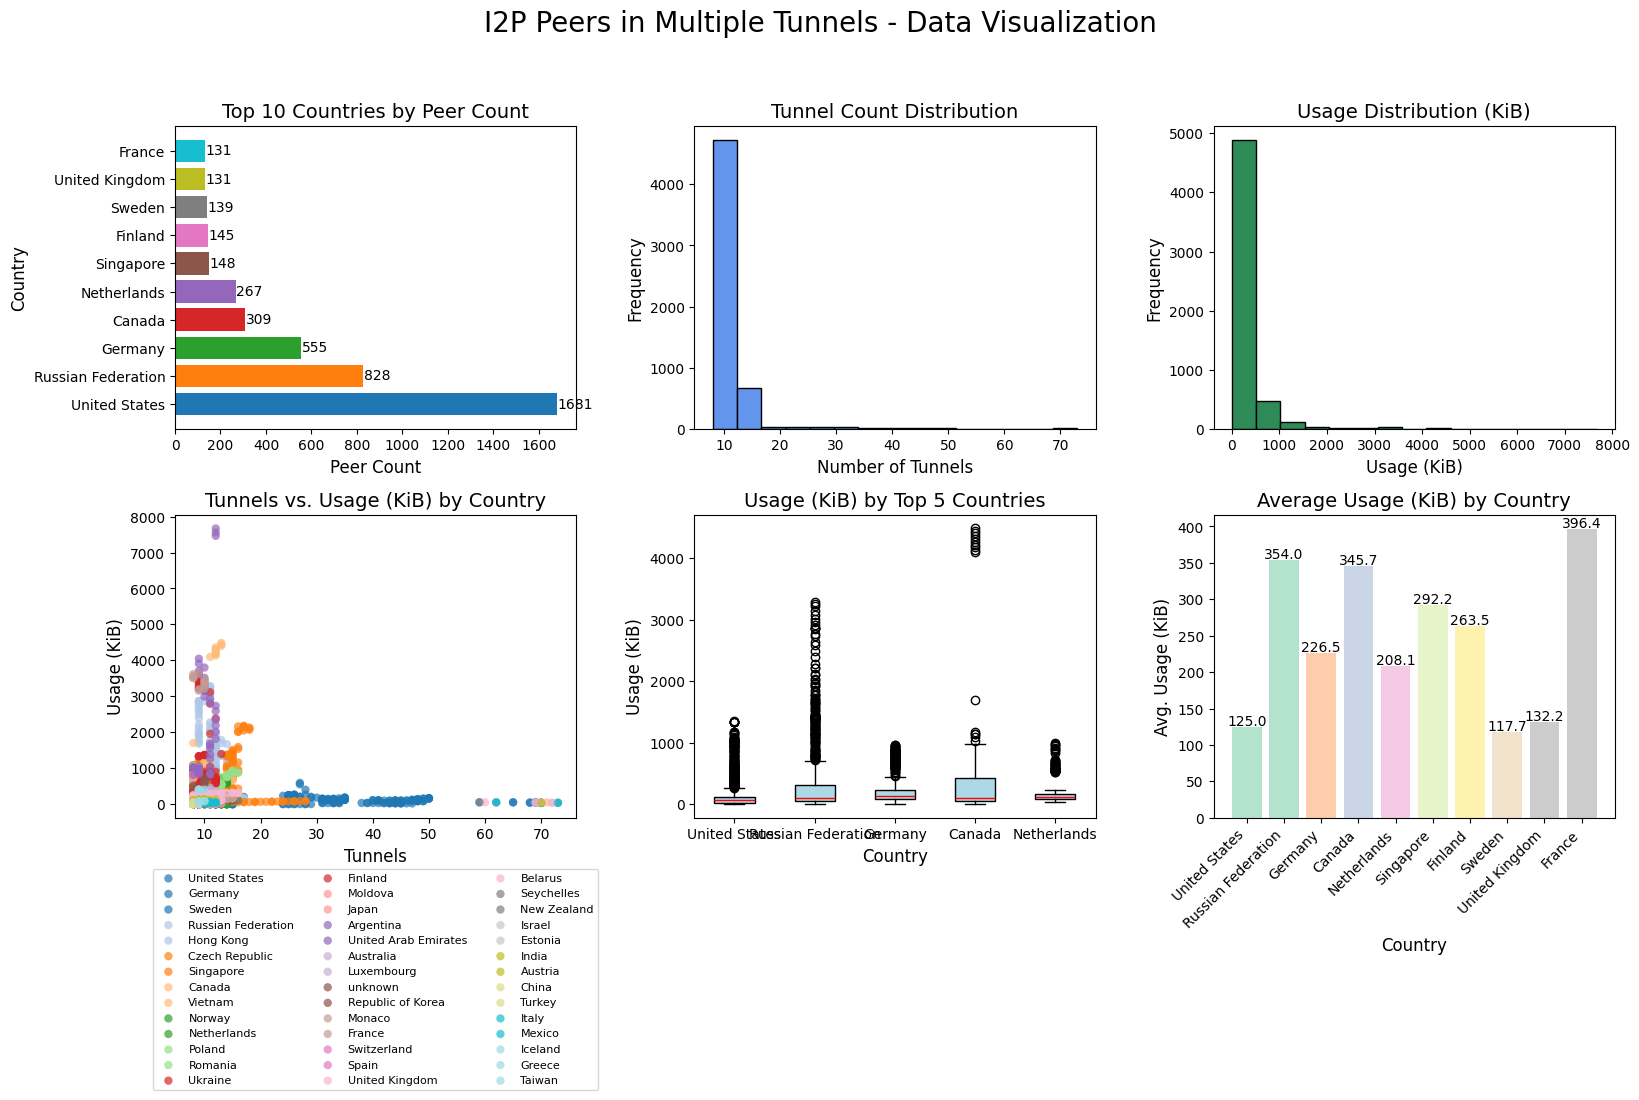

In [1]:
# ---------------------------
# Step 1: Import packages and mount Google Drive
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# ---------------------------
# Step 2: Load the dataset
# ---------------------------
file_path = "/content/drive/MyDrive/SAWRMi2p - data in Brief - Elsevier/18.i2p_Peers in Multiple Tunnels.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Step 3: Preprocess the data
# ---------------------------
def convert_usage_to_kib(usage_str):
    """Convert usage strings (e.g., '31KiB', '1.96MiB') to float in KiB."""
    usage_str = str(usage_str).strip()
    if usage_str.endswith("KiB"):
        return float(usage_str.replace("KiB", "").strip())
    elif usage_str.endswith("MiB"):
        return float(usage_str.replace("MiB", "").strip()) * 1024
    elif usage_str.endswith("GiB"):
        return float(usage_str.replace("GiB", "").strip()) * 1024 * 1024
    elif usage_str.endswith("B"):
        val = usage_str.replace("B", "").strip()
        return 0.0 if val in ["", "0"] else float(val) / 1024.0
    else:
        try:
            return float(usage_str)
        except:
            return np.nan

df['Usage_KiB'] = df['Usage'].apply(convert_usage_to_kib)
df['Tunnels'] = pd.to_numeric(df['Tunnels'], errors='coerce')

# ---------------------------
# Step 4: Prepare data for plotting
# ---------------------------
# (a) Top 10 Countries by Peer Count (for Chart 1 & 6)
top_countries = df['Country'].value_counts().head(10)

# (b) Average usage (KiB) by Country for the top 10 countries
avg_usage_by_country = df.groupby('Country')['Usage_KiB'].mean().loc[top_countries.index]

# (c) For Chart 5: Boxplot data for top 5 countries by peer count
top5_countries = df['Country'].value_counts().head(5).index.tolist()

# ---------------------------
# Step 5: Create the Consolidated Figure (2x3 grid, white background, landscape)
# ---------------------------
fig, axs = plt.subplots(2, 3, figsize=(16.5, 11.7), facecolor='white')
fig.suptitle("I2P Peers in Multiple Tunnels - Data Visualization", fontsize=20, color='black')

# Chart 1: Horizontal Bar Chart for Top 10 Countries by Peer Count
bars = axs[0, 0].barh(top_countries.index, top_countries.values,
                      color=plt.cm.tab10(np.linspace(0,1,len(top_countries))))
axs[0, 0].set_title("Top 10 Countries by Peer Count", fontsize=14, color='black')
axs[0, 0].set_xlabel("Peer Count", fontsize=12, color='black')
axs[0, 0].set_ylabel("Country", fontsize=12, color='black')
axs[0, 0].tick_params(axis='both', labelsize=10, colors='black')
axs[0, 0].set_facecolor('white')
# Annotate bars with values
for bar in bars:
    width = bar.get_width()
    axs[0, 0].text(width + 2, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                   va='center', fontsize=10, color='black')

# Chart 2: Histogram of Tunnel Counts
axs[0, 1].hist(df['Tunnels'].dropna(), bins=15, color='cornflowerblue', edgecolor='black')
axs[0, 1].set_title("Tunnel Count Distribution", fontsize=14, color='black')
axs[0, 1].set_xlabel("Number of Tunnels", fontsize=12, color='black')
axs[0, 1].set_ylabel("Frequency", fontsize=12, color='black')
axs[0, 1].tick_params(axis='both', labelsize=10, colors='black')
axs[0, 1].set_facecolor('white')

# Chart 3: Histogram of Usage (KiB)
axs[0, 2].hist(df['Usage_KiB'].dropna(), bins=15, color='seagreen', edgecolor='black')
axs[0, 2].set_title("Usage Distribution (KiB)", fontsize=14, color='black')
axs[0, 2].set_xlabel("Usage (KiB)", fontsize=12, color='black')
axs[0, 2].set_ylabel("Frequency", fontsize=12, color='black')
axs[0, 2].tick_params(axis='both', labelsize=10, colors='black')
axs[0, 2].set_facecolor('white')

# Chart 4: Scatter Plot (Tunnels vs. Usage) Colored by Country
unique_countries = df['Country'].dropna().unique()
cmap = plt.cm.get_cmap('tab20', len(unique_countries))
for i, country in enumerate(unique_countries):
    subset = df[df['Country'] == country]
    axs[1, 0].scatter(subset['Tunnels'], subset['Usage_KiB'], color=cmap(i),
                      label=country, alpha=0.7, edgecolor='none')
axs[1, 0].set_title("Tunnels vs. Usage (KiB) by Country", fontsize=14, color='black')
axs[1, 0].set_xlabel("Tunnels", fontsize=12, color='black')
axs[1, 0].set_ylabel("Usage (KiB)", fontsize=12, color='black')
axs[1, 0].tick_params(axis='both', labelsize=10, colors='black')
axs[1, 0].set_facecolor('white')
# Place legend in 3 columns below the plot
handles, labels = axs[1, 0].get_legend_handles_labels()
axs[1, 0].legend(handles, labels, fontsize=8, ncol=3, loc='upper center',
                 bbox_to_anchor=(0.5, -0.15), frameon=True)

# Chart 5: Boxplot of Usage (KiB) for Top 5 Countries
data_box = [df[df['Country'] == country]['Usage_KiB'].dropna() for country in top5_countries]
axs[1, 1].boxplot(data_box, labels=top5_countries, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red'))
axs[1, 1].set_title("Usage (KiB) by Top 5 Countries", fontsize=14, color='black')
axs[1, 1].set_xlabel("Country", fontsize=12, color='black')
axs[1, 1].set_ylabel("Usage (KiB)", fontsize=12, color='black')
axs[1, 1].tick_params(axis='both', labelsize=10, colors='black')
axs[1, 1].set_facecolor('white')

# Chart 6: Bar Chart of Average Usage (KiB) by Country (Top 10) with annotations
bars2 = axs[1, 2].bar(top_countries.index, avg_usage_by_country.values,
                      color=plt.cm.Pastel2(np.linspace(0,1,len(avg_usage_by_country))))
axs[1, 2].set_title("Average Usage (KiB) by Country", fontsize=14, color='black')
axs[1, 2].set_xlabel("Country", fontsize=12, color='black')
axs[1, 2].set_ylabel("Avg. Usage (KiB)", fontsize=12, color='black')
axs[1, 2].tick_params(axis='both', labelsize=10, colors='black')
axs[1, 2].set_facecolor('white')
plt.setp(axs[1, 2].get_xticklabels(), rotation=45, ha='right')
# Annotate bars with average usage values
for bar in bars2:
    height = bar.get_height()
    axs[1, 2].text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}',
                   ha='center', fontsize=10, color='black')

# ---------------------------
# Step 6: Final Adjustments and Save
# ---------------------------
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.patch.set_facecolor('white')
fig.savefig("I2P_Peers_MultiTunnel_6Charts_Annotated.pdf", format="pdf", dpi=300, facecolor='white')
print("Figure saved as 'I2P_Peers_MultiTunnel_6Charts_Annotated.pdf' at 300 DPI.")
plt.show()


/tmp/ipython-input-1375135302.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_countries))
/tmp/ipython-input-1375135302.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 1].boxplot(data_box, labels=top5_countries, patch_artist=True,


Figure saved as 'I2P_Peers_MultiTunnel_Consolidated_Landscape.pdf' with 300 DPI.


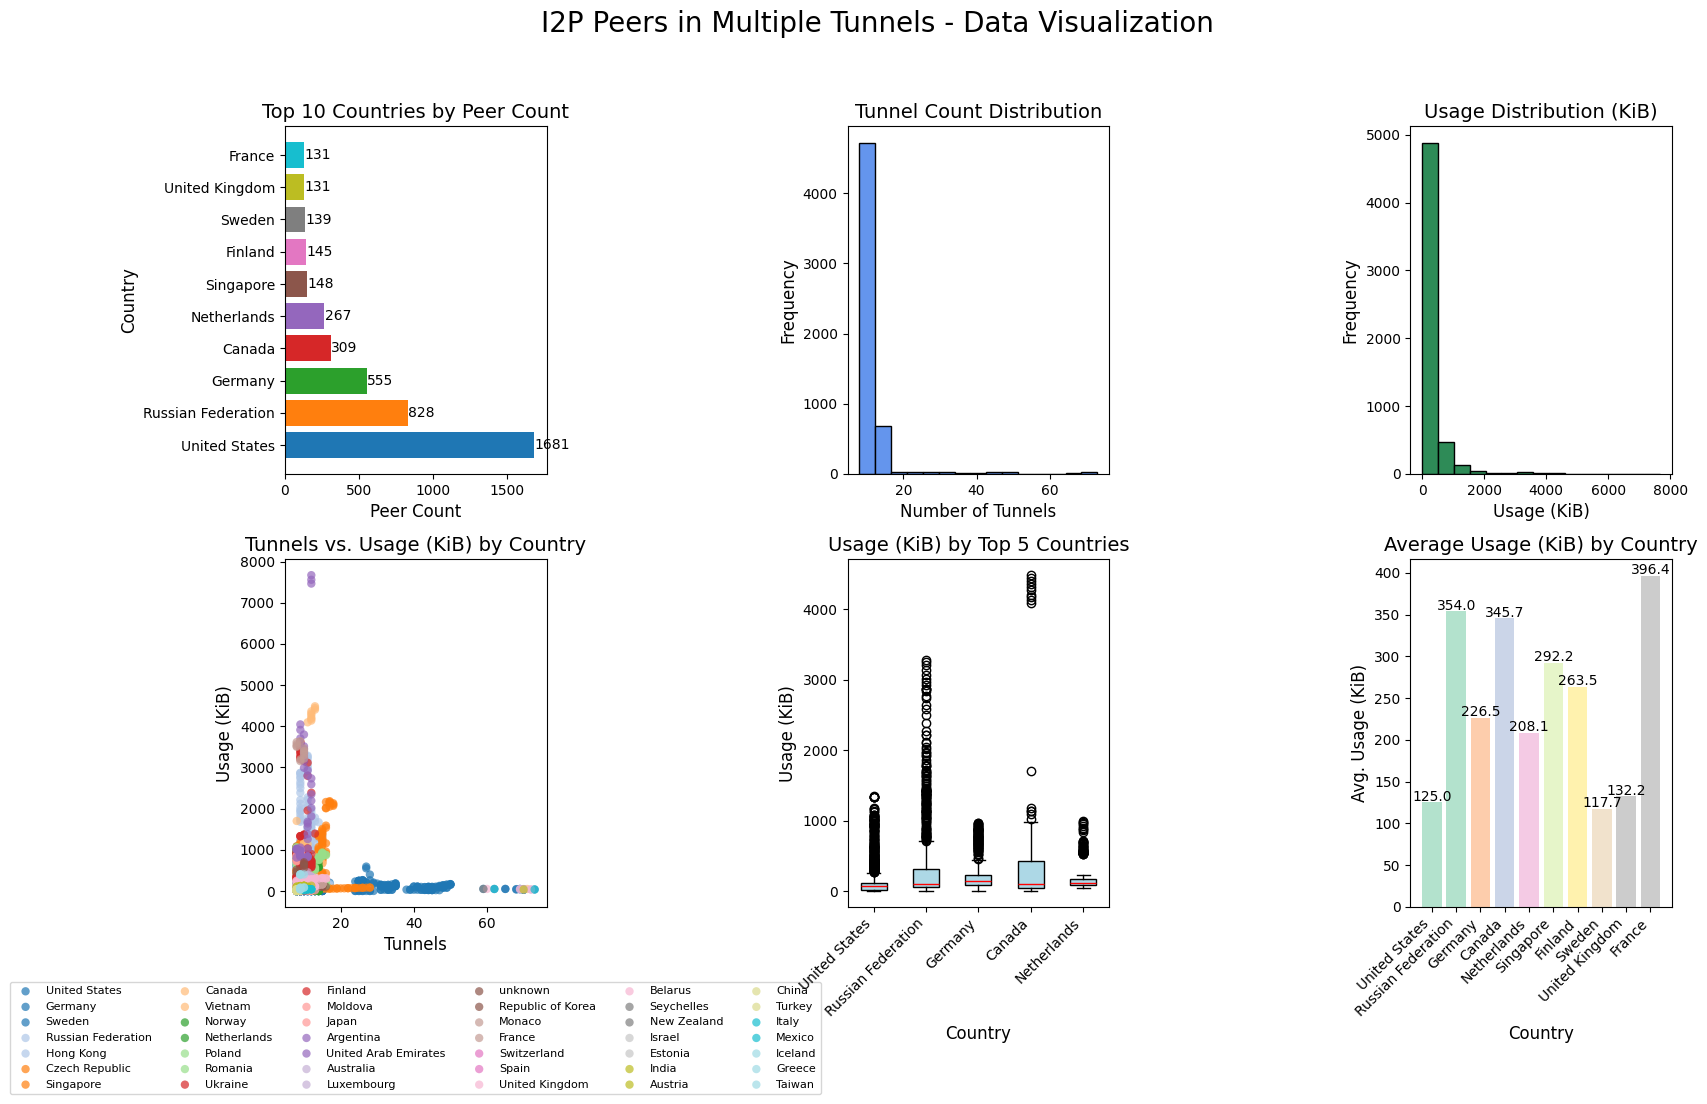

In [2]:
# Step 5: Create consolidated figure (2x3 grid, landscape, white background)
fig, axs = plt.subplots(2, 3, figsize=(16.5, 11.7), facecolor='white')
fig.suptitle("I2P Peers in Multiple Tunnels - Data Visualization", fontsize=20, color='black')

# Chart 1: Horizontal Bar Chart for Top 10 Countries by Peer Count
bars = axs[0, 0].barh(top_countries.index, top_countries.values, color=plt.cm.tab10(np.linspace(0, 1, len(top_countries))))
axs[0, 0].set_title("Top 10 Countries by Peer Count", fontsize=14, color='black')
axs[0, 0].set_xlabel("Peer Count", fontsize=12, color='black')
axs[0, 0].set_ylabel("Country", fontsize=12, color='black')
axs[0, 0].tick_params(axis='both', labelsize=10, colors='black')
axs[0, 0].set_facecolor('white')
for bar in bars:
    width = bar.get_width()
    axs[0, 0].text(width + 2, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                   va='center', fontsize=10, color='black')

# Chart 2: Histogram of Tunnel Counts
axs[0, 1].hist(df['Tunnels'].dropna(), bins=15, color='cornflowerblue', edgecolor='black')
axs[0, 1].set_title("Tunnel Count Distribution", fontsize=14, color='black')
axs[0, 1].set_xlabel("Number of Tunnels", fontsize=12, color='black')
axs[0, 1].set_ylabel("Frequency", fontsize=12, color='black')
axs[0, 1].tick_params(axis='both', labelsize=10, colors='black')
axs[0, 1].set_facecolor('white')

# Chart 3: Histogram of Usage (KiB)
axs[0, 2].hist(df['Usage_KiB'].dropna(), bins=15, color='seagreen', edgecolor='black')
axs[0, 2].set_title("Usage Distribution (KiB)", fontsize=14, color='black')
axs[0, 2].set_xlabel("Usage (KiB)", fontsize=12, color='black')
axs[0, 2].set_ylabel("Frequency", fontsize=12, color='black')
axs[0, 2].tick_params(axis='both', labelsize=10, colors='black')
axs[0, 2].set_facecolor('white')

# Chart 4: Scatter Plot (Tunnels vs. Usage) Colored by Country
unique_countries = df['Country'].dropna().unique()
cmap = plt.cm.get_cmap('tab20', len(unique_countries))
for i, country in enumerate(unique_countries):
    subset = df[df['Country'] == country]
    axs[1, 0].scatter(subset['Tunnels'], subset['Usage_KiB'], color=cmap(i),
                      label=country, alpha=0.7, edgecolor='none')
axs[1, 0].set_title("Tunnels vs. Usage (KiB) by Country", fontsize=14, color='black')
axs[1, 0].set_xlabel("Tunnels", fontsize=12, color='black')
axs[1, 0].set_ylabel("Usage (KiB)", fontsize=12, color='black')
axs[1, 0].tick_params(axis='both', labelsize=10, colors='black')
axs[1, 0].set_facecolor('white')
# Arrange legend with 6 columns at the bottom of the subplot
handles, labels = axs[1, 0].get_legend_handles_labels()
axs[1, 0].legend(handles, labels, fontsize=8, ncol=6,
                 loc='upper center', bbox_to_anchor=(0.5, -0.2), frameon=True)

# Chart 5: Boxplot of Usage (KiB) for Top 5 Countries
data_box = [df[df['Country'] == country]['Usage_KiB'].dropna() for country in top5_countries]
axs[1, 1].boxplot(data_box, labels=top5_countries, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red'))
axs[1, 1].set_title("Usage (KiB) by Top 5 Countries", fontsize=14, color='black')
axs[1, 1].set_xlabel("Country", fontsize=12, color='black')
axs[1, 1].set_ylabel("Usage (KiB)", fontsize=12, color='black')
axs[1, 1].tick_params(axis='both', labelsize=10, colors='black')
axs[1, 1].set_facecolor('white')
plt.setp(axs[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=10, color='black')

# Chart 6: Bar Chart of Average Usage (KiB) by Country for Top 10 Countries
bars2 = axs[1, 2].bar(top_countries.index, avg_usage_by_country.values,
                      color=plt.cm.Pastel2(np.linspace(0, 1, len(avg_usage_by_country))))
axs[1, 2].set_title("Average Usage (KiB) by Country", fontsize=14, color='black')
axs[1, 2].set_xlabel("Country", fontsize=12, color='black')
axs[1, 2].set_ylabel("Avg. Usage (KiB)", fontsize=12, color='black')
axs[1, 2].tick_params(axis='both', labelsize=10, colors='black')
axs[1, 2].set_facecolor('white')
plt.setp(axs[1, 2].get_xticklabels(), rotation=45, ha='right', fontsize=10, color='black')
for bar in bars2:
    height = bar.get_height()
    axs[1, 2].text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}',
                   ha='center', fontsize=10, color='black')

# Step 6: Final adjustments: ensure all elements are neat and export the figure in landscape (A4)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.patch.set_facecolor('white')
fig.savefig("I2P_Peers_MultiTunnel_Consolidated_Landscape.pdf", format="pdf", dpi=300, facecolor='white')
print("Figure saved as 'I2P_Peers_MultiTunnel_Consolidated_Landscape.pdf' with 300 DPI.")
plt.show()
